In [1]:
from penman import SensitivityModel
from delphi.GrFN.visualization import SensitivityVisualizer

# Introduction to Model Comparison

The ASKE AutoMATES program involves four different pipelines viz., Extraction, Grounding, Comparison,
and Augmentation. Extraction and Grounding together are responsible for creating a generalized intermediate 
representation (Grounded Function Network - GrFN) of source codes that are linked to information about the 
underlying models, equations, as well as the 
physical variables extracted from scientific documents and other relevant text. Once such a unified framework has been
created, indepedent models can be compared (Comparison) and even augmented (Augmentation) for validation purposes. 
Through our GrFN representation, 
we can analyze the structural and functional properties of the network that will allow us to 
identify regions of parameter spaces where 
our selected models display similar features/properties. 

# Sensitivity Index : Sobol Analysis

The robustness of any model that is dependent on a set of input variables can be tested by performing a sensitivity analysis. Sensitivity analysis are of two types - local and global. Unlike local sensitivity analysis which involves measurement of variations in model output with respect small perturbations in one single parameter, global sensitivity indices evaluate changes in model output as every single input parameter is varied simultaneously over their respective spaces. This allows the experimenter to measure the relative contributions of individual parameters as well as the interaction of the input parameters amongst themselves to the overall output variance. Although there are numerous methods available to perform global sensitivity analysis for eg., Sobol, Fourier Amplitude Sensitivity Test (FAST), and Random Balance Design-Fourier Sensitivity Test (RBD-FAST) etc., in this document, we shall focus on only Sobol and discuss in brief the utility and limitations of the other two methods. 

The methods mentioned previously all depend on a variance decomposition technique. Sobol method depends on the ANOVA (Analysis of Variance) representation of a mathematical model where the output variance is decomposed into linear summands of variance in the input parameters. These summands are computed through quasi-Monte Carlo methods. Each of the integrands in the ANOVA decomposition represents the order of input parameter contribution. Hence, the first order measures the variability in model output due to a single parameter whereas every subsequent higher order index quantifies the dependence of output variance on the interaction among the constituents of each parameter set. In the case of independent variables, the total sum of sensitivity indices over all parameter sets should be equal to one. It must be noted that while the indices computed from Sobol analysis can determine the extent to which a parameter affects variations in output, it cannot determine the cause of such an effect. Since Sobol relies on Monte-Carlo estimates of the integrands, they are approximated by averaging randomly sampled functions. Given below is a list of sample sizes (sample_list = [10, 100, 1000, 10000, 100000]) that will be used for computing sobol indices. While there is no singular rule on establishing a cut-off to determine which parameters have a large influence, for our purposes, we will choose 0.01 or higher to be significant, especially in complex models.

In [2]:
##### List of Sample Sizes #####

sample_list = [10**x for x in range(1, 6)]

##### Sobol ##### 

method = 'Sobol'

## PETPT

The DSSAT database has seven different physical models that aim to predict the potential evapotranspiration
rates of a multitude of crops. The Priestley-Taylor (PETPT) model is one such model that computes the evapotranspiration rate (EO) of a crop/plant. The model depends on the following independent variables - the maximum ('tmax') and minimum ('tmin') observable temperatures within a given day, daily solar radiation ('srad'), leaf area index ('xhlai'), and soil albedo coefficient ('msalb'). 
For computational purposes, the SALib library in Python allows one to perform a sensitivity analysis for a given model. Given below are the results of the Sobol method for a chosen set of input parameter space or bounds. 

It is evident that temperature, specifically 'tmax' is responsible for generating significant variance in the output for slight changes in its value as indicated by the persisent large first order index (S$_i$) value across different sample sizes (logarithm scale). Close on the heels of 'tmax' is the incident solar radiation or 'srad' with a moderately large index. These results are not unexpected since temperature and sunlight are essential to controlling transpiration rates. Higher the temperature/sunlight, higher the EO rates. Interestingly, all the other three parameters have insignificant first order contribution. In order to ensure that convergence in the Monte Carlo calculation of indices has been achieved, these calculations need to be performed for large sample sizes, typically of the order of $10^5$ as can be seen from the figure below where for $log(N) > 3$, S$_i$ is stable. As a consequence, the indices are not reliable for small sample sizes.

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


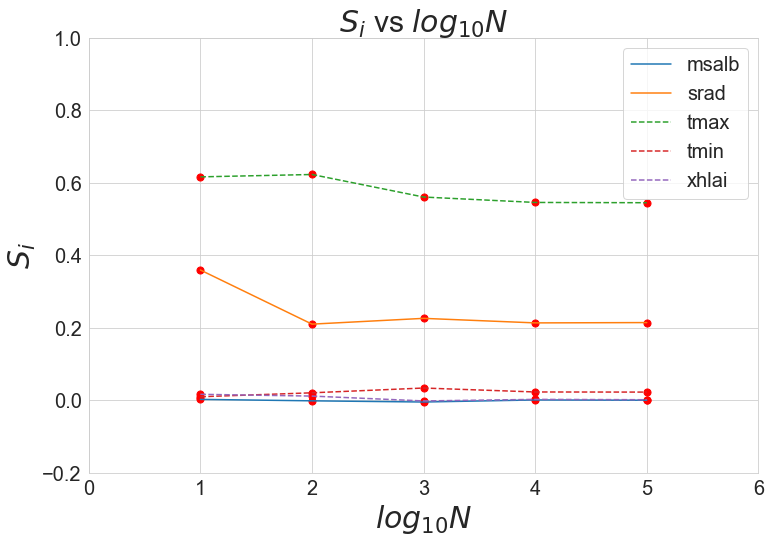

In [3]:
##### PETPT #####

model = 'PETPT'
bounds = {
        'tmax':[-30.0, 60.0],
        'tmin':[-30.0, 60.0],
        'srad': [0.0, 30.0],
        'msalb': [0.0, 1.0],
        'xhlai': [0.0, 20.0]
    }


SM = SensitivityModel(model, bounds, sample_list, method)

df_PETPT_S1, df_PETPT_ST = SM.generate_dataframe()

indices_lst = SM.generate_indices()

component = 'S1'
SM.sensitivity_plots(indices_lst, component)

The results of the second order Sobol index ($S_{ij}$)) is presented below. An important point that should be kept in mind is that sine these are variance computations, sobol indices are strictly non-negative. At the same time, as discussed before, such computations are only reliable if the sample size is large enough. Hence, in the two dimensional matrix shown below each cell contains the second order index for a given pair of input parameters. In the case of PETPT, only the pair of 'tmax' and 'srad' produces significant $S_{ij}$ wheras the interaction between any other pair of variables is negligible. Yet again, this result is not unexpected since 'tmax' and 'srad' are both positively correlated and their combined interaction would have great impact on the evapotranspiration rate. As before, to check if convergence has been established or not, we emphasize on plotting a diverging palette as the scheme of the colorbar. Since, there aren't any indices that are strongly negative (any negative index lies within a small interval centered around zero), we are confident that are calculations are accurate.

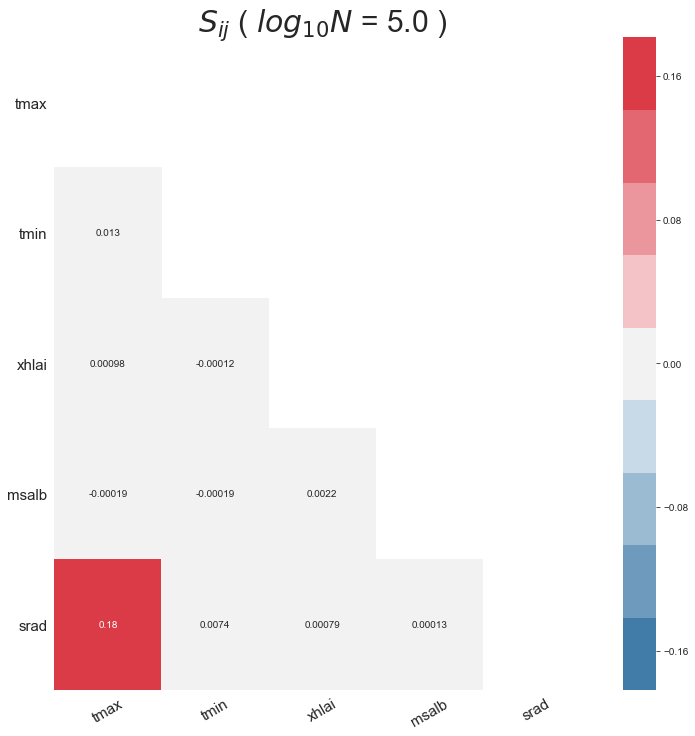

In [4]:
component = 'S2'
SM.sensitivity_plots(indices_lst, component)

Computation of Sensitivity Indices has three components - sampling, execution, and analysis. 'Sampling Time' depends on the size of the sample as well as input variable vector size. If one wishes to compute the second order indices, the total number of samples is increased. Once the samples have been generated, model outputs are generated from the input bounds and GrFN. The time taken to carry it out is given by 'Execution Time'. Finally, computation of indices is performed and the time taken to do so is given by the 'Analysis Time'. The speed of computation can be greatly enhanced if one were to use FAST and RBD-FAST methods. The disadvantage of using these techniques is the inability to calculate second order indices. Hence, we are only restricted to calculating the first and total order if such methods were to be implemented.

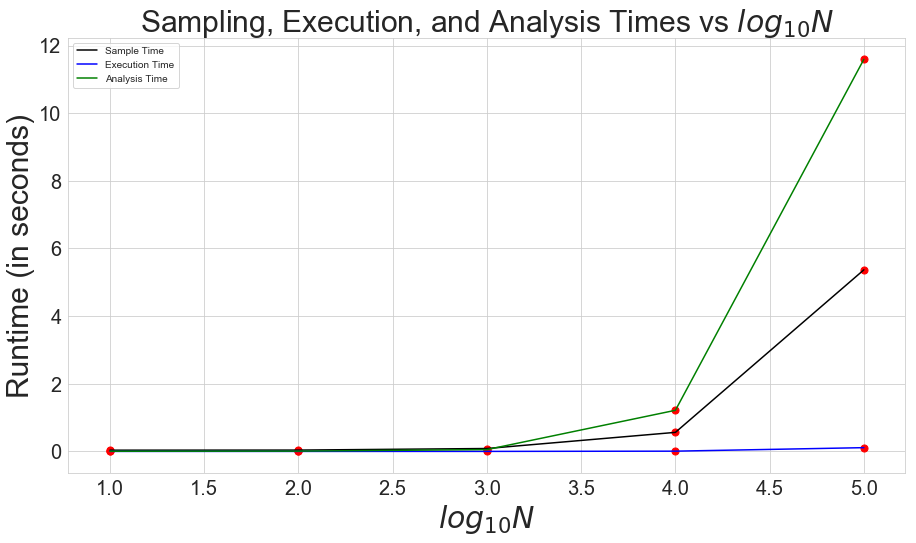

In [5]:
component = 'runtime'
SM.sensitivity_plots(indices_lst, component)

An important feature of sobol indices is their susceptibility to fluctuations in the bounds of the input parameters. This is highlighted in the figure below where a different but reasonable set of upper and lower bounds have been chosen for the input parameters of the PETPT model. The values are similar to the ones used to simulate potential evapotranspiration rates of soybean. It is apparent that such a choice remarkably alters the profile of $S_i$ vs $log_{10}(N)$ plots as seen below. In this case, 'srad' almost entirely contributes to the overall sobol index since $S_i$ due to it almost 1, whereas the influence of 'tmax' is minimal. This is a strong departure from what we saw in the figure above, where 'tmax' had a larger contribution.

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


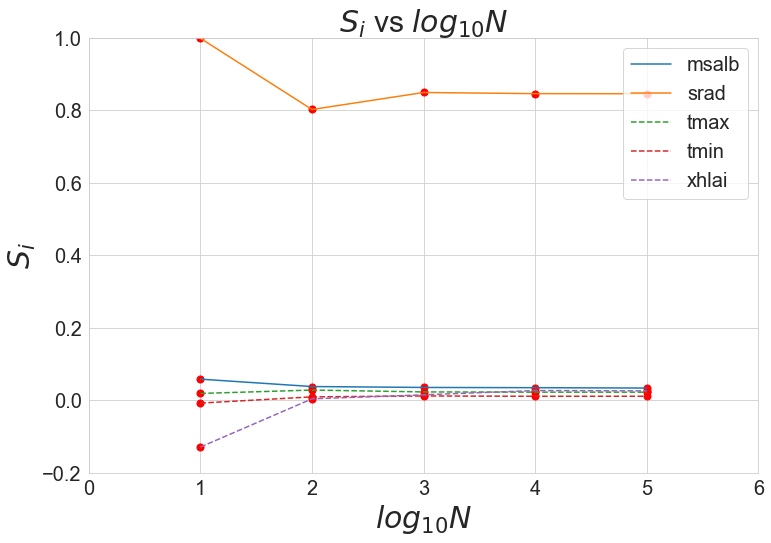

In [6]:
bounds = {
        'tmax':[16.0, 36.7],
        'tmin':[0.0, 23.9],
        'srad': [2.45, 27.8],
        'msalb': [0.0, 1],
        'xhlai': [0.0, 4.77]
    }

SM = SensitivityModel(model, bounds, sample_list, method)


indices_lst = SM.generate_indices()

component = 'S1'
SM.sensitivity_plots(indices_lst, component)

## PETPNO

Aside from incident light and temperature, the evapotranspiration rate of a crop depends on a host of other atmospheric and weather conditions, for example, relative humidity and wind speed in the vicinity of the crop. It is common knowledge that both dry air and larger wind speed would intesify the evapotranspiration process. The PETPNO tries to address these issues by including a new set of independent parameters in addition to the PETPT variables. Our results below indicate that in spite of the inclusion of other factors in the model, priamry contribution to the overall first order sensitivity index comes from solar radiation or 'srad', followed by the maximum, minimum as. well as the dew point temperatures ('tmax', 'tmin', 'tdew'), respectively. Since, there is substantial increase in the number of parameters and. the total sum of all indices is equal to one under the assumption of absence of multicollinearity, all $S_i$ indices are smaller in magnitude compared to their PETPT values. The parameter 'clouds' represents the relative cloudiness factor and takes into account the humidity of the surroundings. Sensitivity analysis shows that while the humidity does play a role in producing variations in the output, its overall effect is minimal. 

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


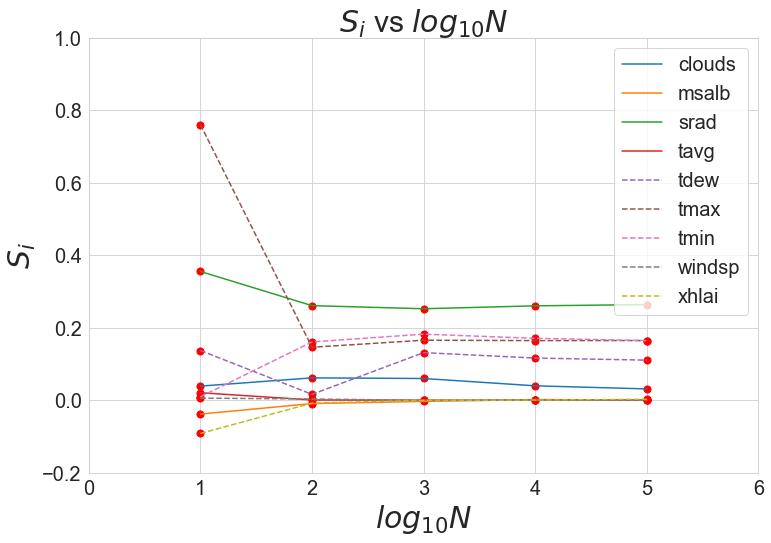

In [4]:
#### PETPNO ####

model = 'PETPNO'

bounds = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [0.0, 10.0],
    'clouds': [0.0, 1.0]
}

SM = SensitivityModel(model, bounds, sample_list, method)

df_PETPNO_S1, df_PETPNO_ST = SM.generate_dataframe()

indices_lst = SM.generate_indices()

component = 'S1'
SM.sensitivity_plots(indices_lst, component)

The case of $S_{ij}$ is far more interesting since it encapsulates the interactions between the model parameters. From the figure below, we see that the interaction of only a subset of parameters ($C$) ,i.e ('tmax', 'tmin', 'tdew', 'srad', 'clouds') is relevant to variance analysis. While there are a total of $^{5}C_2$ combinations of possible pair, only 6 are important. The largest $S_{ij}$ values of $0.034$, $0.033$ (2) come from the following pairs - ('tdew', 'clouds'), ('tmax', 'srad'), ('tmin', 'srad'). Other relevant input pairs with the same order of magnitude that contribute to the overall second order index are: ('tmax', 'tmin'), ('tmax', ''), ('tmin', 'tdew'). Thus, this analysis shows that the dominant parameters in the estimation of the sensitivity indices consist of the fundamental atmospheric factors that influence evapotranspiration rates.

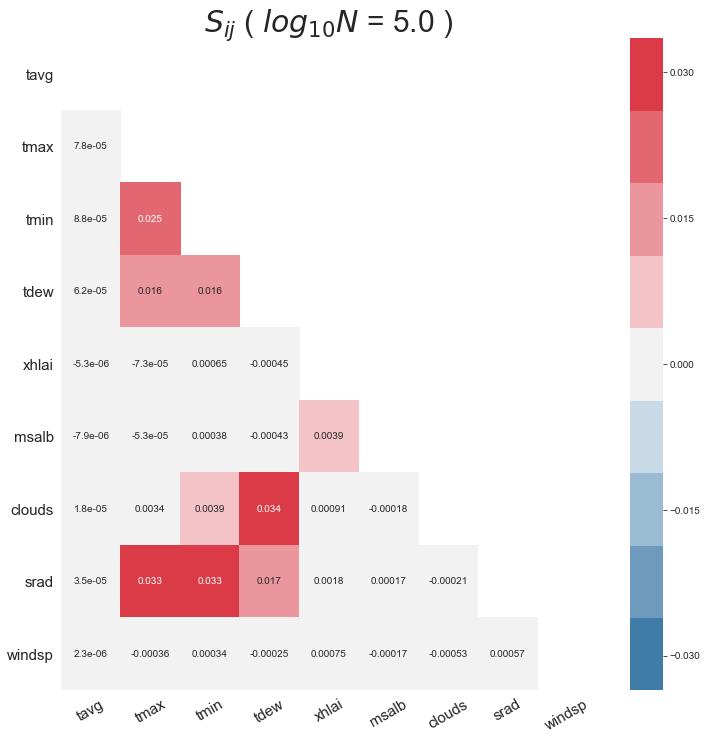

In [8]:
component = 'S2'
SM.sensitivity_plots(indices_lst, component)

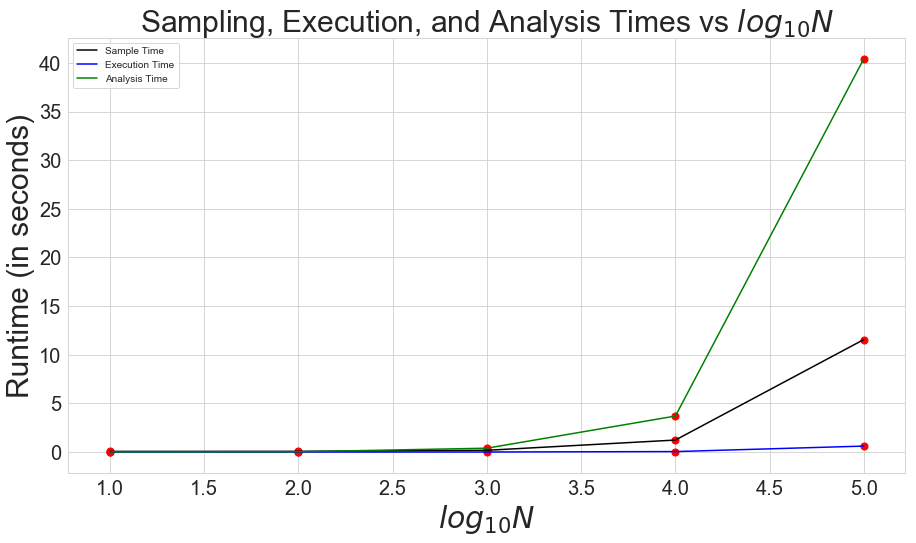

In [9]:
component = 'runtime'
SM.sensitivity_plots(indices_lst, component)

## PETPEN 

The PETPEN is perhaps the only model among all the ones mentioned in this document that closely resembles PETPNO in its functional dependence with minor modifications. Apart from all the variables that appear in PETPNO, PETPEN has three additional variables, namely, 'eoratio','vapr' (vapor pressure), and 'windht'. Reasonable estimates of their upper and lower bounds are chosen and results of sobol analysis is shown below. Yet again, we observe that 'srad' has the largest $S_i$ value. The daily temperatures ('tmax', 'tmin', 'tdew') marginally influence the output. As seen in the case of PETPNO, none of the indices exceed 0.5 due to the increased parameter space and the normalisation criteria. However, there is a significant departure with the introduction of 'eoratio' which until now was absent in the previous models. The plot below shows that for sufficiently large sample sizes, both 'eoratio' and 'srad' result in $S_i$ that are almost similar in magnitude.

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


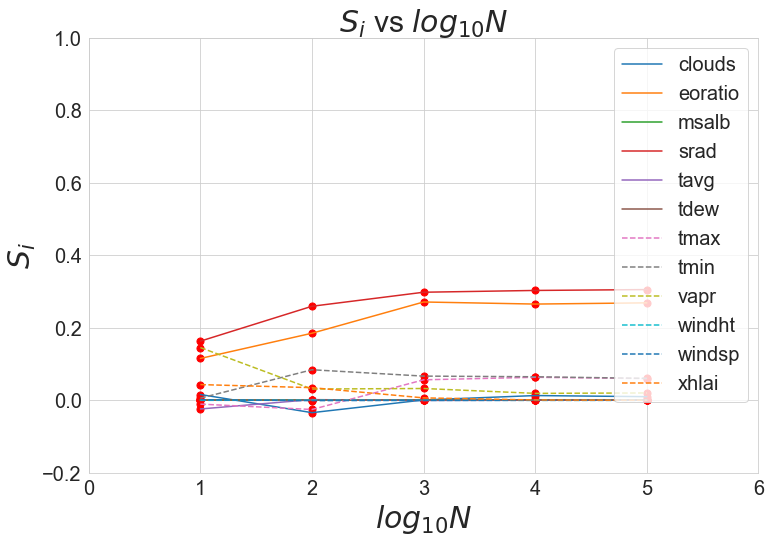

In [5]:
#### PETPEN #####

model = 'PETPEN'

bounds = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [1.0, 10.0],
    'windht': [1.0, 25.0],
    'vapr': [0.0, 20.0],
    'clouds': [0.0, 1.0],
    'eoratio': [0.0, 2.0]
}

SM = SensitivityModel(model, bounds, sample_list, method)

df_PETPEN_S1, df_PETPEN_ST = SM.generate_dataframe()

indices_lst = SM.generate_indices()

component = 'S1'
SM.sensitivity_plots(indices_lst, component)

The second order index calculation brings to the fore the differences in the response of the model output variance to variations in the interactions among the parameters. Unlike what was observed in PETPNO, the pairs of variables that greatly influence the output variance in this model are given by ('eoratio', 'srad'), ('eoratio', 'xhlai'), ('clouds', 'vapr') in ascending order of importance with negligible contributions from ('tmax', 'tmin'), ('tmax', 'srad/eoratio'), ('tmin', 'srad/eoratio'). The latter half of parameter sets had a more dominant effect in PETPNO which is minimized by the presence of 'eoratio'.

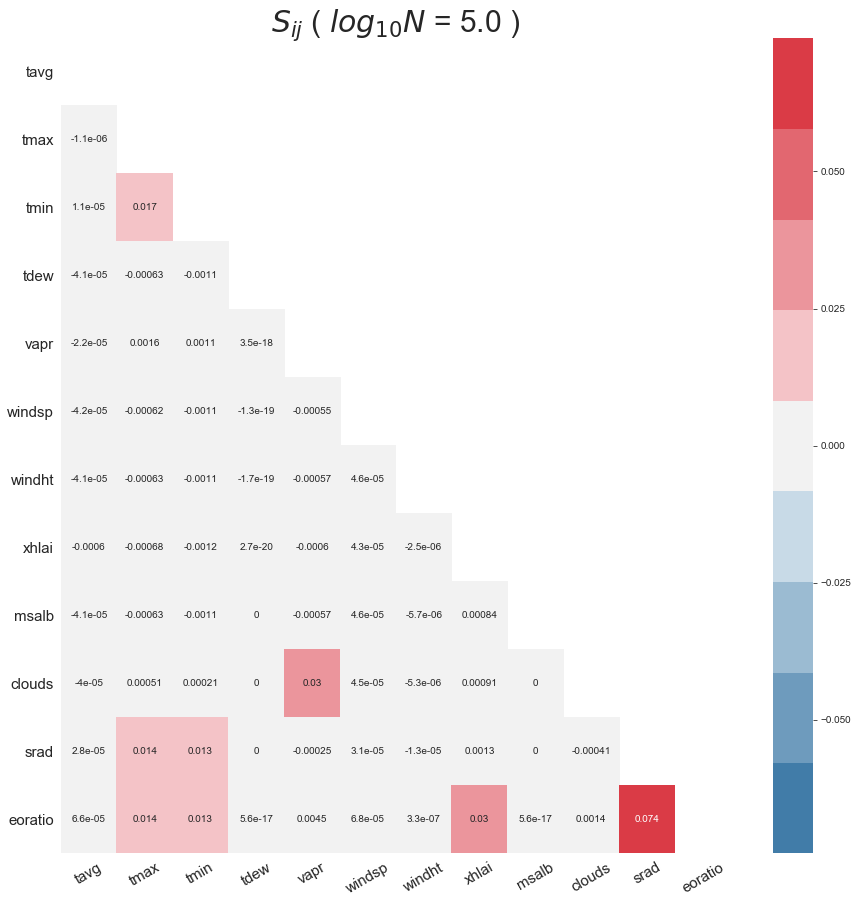

In [11]:
component = 'S2'
SM.sensitivity_plots(indices_lst, component)

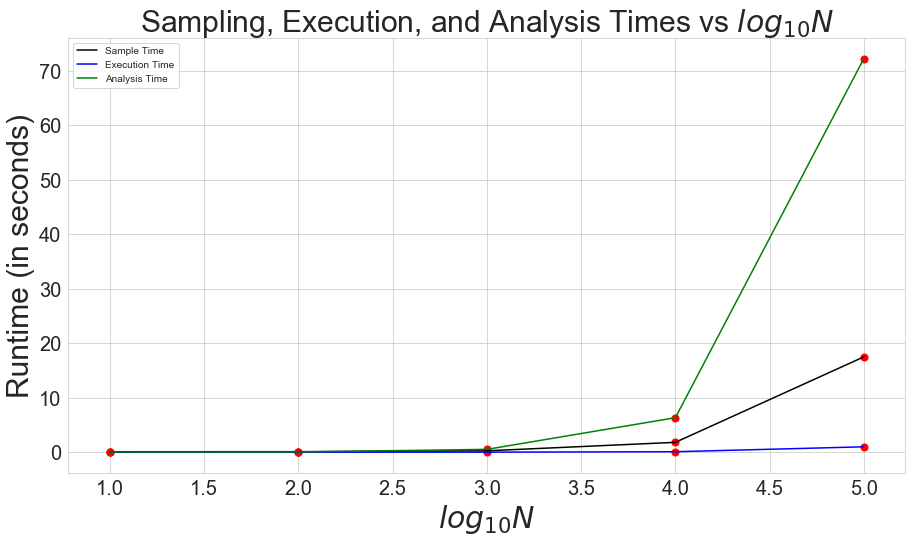

In [12]:
component = 'runtime'
SM.sensitivity_plots(indices_lst, component)

## PETDYN

The PETDYN model is again similar to PETPEN which tries to model potential evapotranspiration rates with one extra parameter - a dynamic 'canht' (crop height) in place of 'eoratio' and 'vapr'. The results of the sensitivity analysis are as expected with 'srad' yielding the maximum magnitude at the first order, followed by 'tmax' and 'tmin'. Similar to PETPNO, ('clouds', 'tdew'), ('tmax', 'tmin'), ('tmax', 'srad'), and ('tmin', 'srad') have the largest second order indices with the first pair producing an $S_{ij}$ of $0.065$.

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


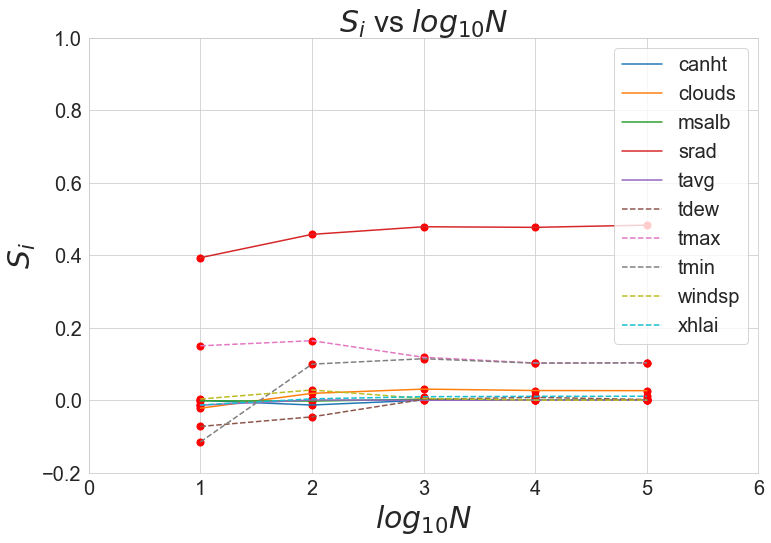

In [6]:
#### PETDYN ####

model = 'PETDYN'

bounds = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [0.0, 10.0],
    'canht': [0.0, 5.0],
    'clouds': [0.0, 1.0]
}

SM = SensitivityModel(model, bounds, sample_list, method)

df_PETDYN_S1, df_PETDYN_ST = SM.generate_dataframe()

indices_lst = SM.generate_indices()

component = 'S1'
SM.sensitivity_plots(indices_lst, component)

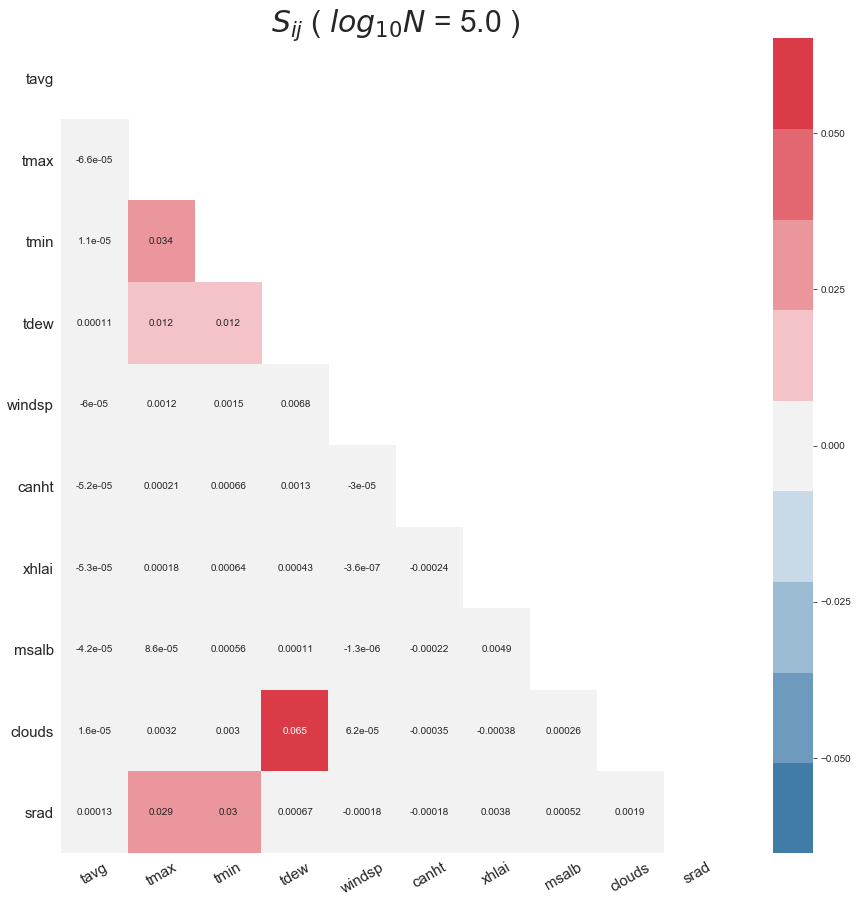

In [14]:
component = 'S2'
SM.sensitivity_plots(indices_lst, component)

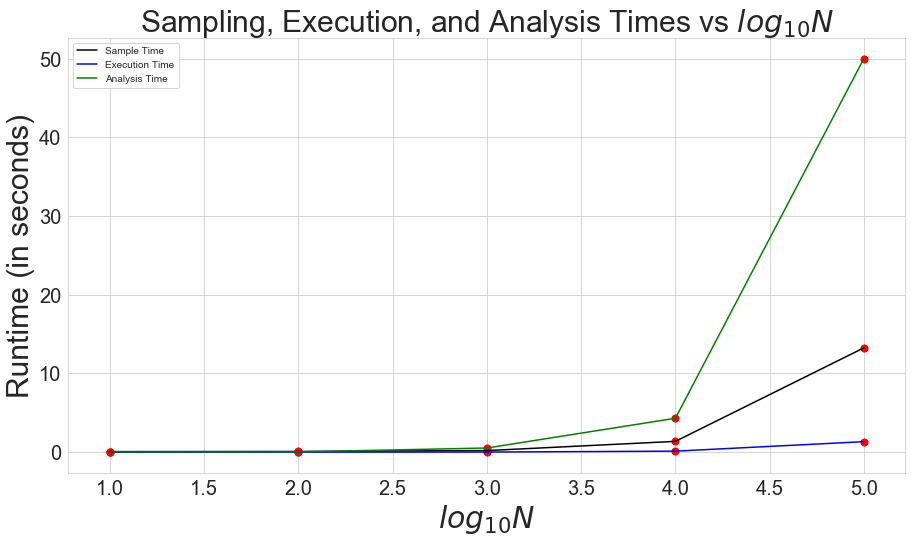

In [15]:
component = 'runtime'
SM.sensitivity_plots(indices_lst, component)

# Comparison of PET models

It is evident from the analysis above, that among all the parameters, only a handful of them will substantially cause significant changes in output variance. The input parameters of PETPT are shared by every single model. These include - 'tmax', 'tmin', 'srad', 'msalb', 'xhlai'. From our results, it becomes obvious that 'srad' is the most influential parameter with the largest first order Sobol index with the exception of PETPT. This must be taken with a grain of salt since sensitivity indices are highly dependent on the interval domains of parameters. After 'srad', daily maximum temperatures, 'tmax' and 'tmin' respecctively, are the most dominant factors. In the special case of PETPEN, 'eoratio' has a first order Sobol index similar to that of 'srad'. The tables below contain the total and first order Sobol indices for the various models with sample size of $10^5$. The trends in both these tables are identical and hence it can be inferred that the first order Sobol index of any parameter is the most dominating term in the ANOVA decomposition and therefore determines the overall contribution to perturbations in the output. Another interesting feature of the calculation comes from the comparison of the total Sobol indices in the penman-monteith models (PETPNO, PETPEN, PETDYN).  In all the three models, $S_T$ and $S_1$ of every shared variable have the same order of magnitude with the only exception of 'tdew'. While both $S_1$ and $S_T$ of 'tdew' in PETPNO is non-negligible, in PETDYN, only the total order, i.e., $S_T$ is relevant whereas, in PETPEN, 'tdew' has almost little to no contribution at all.  More interestingly, the indices computed for 'tmax' and 'tmin'. in these. models are almost equal.

## Table of $S_T$,  $S_1$ values ($log_{10}(N) = 5$)  of different models: PETPT, PETPNO, PETPEN, PETDYN

### 1. $S_T$

In [7]:
from soboltable import table
from IPython.display import display

frames = [df_PETPT_ST, df_PETPNO_ST, df_PETPEN_ST, df_PETDYN_ST]

display(table(frames))

,PETPT,PETPNO,PETPEN,PETDYN
tmax,0.749071,0.299927,0.133464,0.21709
tmin,0.0481217,0.300505,0.133216,0.216793
xhlai,0.00967585,0.0123952,0.0432375,0.0269859
msalb,0.00602553,0.00802686,0,0.00977355
srad,0.411012,0.376308,0.432402,0.577682
tavg,,0.000825469,0.000792441,0.00115511
tdew,,0.25418,0,0.13514
clouds,,0.0888426,0.0654358,0.125939
windsp,,0.000346691,3.34636e-05,0.0152599
vapr,,,0.0809626,


### 2. $S_1$

In [8]:
frames = [df_PETPT_S1, df_PETPNO_S1, df_PETPEN_S1, df_PETDYN_S1]

display(table(frames))

,PETPT,PETPNO,PETPEN,PETDYN
tmax,0.545243,0.164855,0.0601209,0.103782
tmin,0.0226888,0.164832,0.0605688,0.103276
xhlai,0.00167784,0.00282261,0.000230229,0.0112471
msalb,0.000271103,0.001016,0,0.000811829
srad,0.214535,0.26415,0.305543,0.483408
tavg,,0.000404749,0.000378643,0.000571778
tdew,,0.110871,0,0.00232786
clouds,,0.0315,0.0100884,0.0266304
windsp,,7.89166e-05,-3.57335e-05,0.000579281
vapr,,,0.0203159,


##  $S_2$ matrices of different models 

##  a. PETPT and PETPNO

Let us now compare the second order indices of the PET models. The simplest model with the minimum number of parameters is PETPT. PETPNO with four additional parameters, chief among them being 'windsp' and 'clouds', aim to model more complex phenomena. In the figure below, the shared set of parameters have indices highlighted in green (top. panels) whereas the bottom panel is reserved for non-shared parameters of individual models. Here, only PETPNO has non-empty set of non-shared variables whose indices are shown in bottom right panel (blue). From here onwards, we will adopt this same convention for other figures. On comparing their $S_2$ indices (see below), it becomes clear that 'srad' yet again plays a dominant role in its interaction with temperature in both models. However, the index resulting from the interaction between 'tmax' and 'srad' is relevant in PETPT and $S_2$ from 'tmin' and 'srad' is vanishingly small.In contrast, both these indices contribute equally in PETPNO. Beyond this, as has been discussed above, the interaction of 'clouds' and 'tdew' become important as well with significantly large contribution to the total index from 'tdew' (see table above). While one could go on to compare PETPT with the other penman-monteith models as well, it is apparent from our discussion in the preceding section that the picture will not be any different from what is seen below.

In [16]:
from compareS2 import ModelCompareS2

model1 = 'PETPT'

bounds1 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0]
}



bounds2 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [0.0, 10.0],
    'clouds': [0.0, 1.0]
}

model2 = 'PETPNO'

sample_list = [10**x for x in range(5, 6)]

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


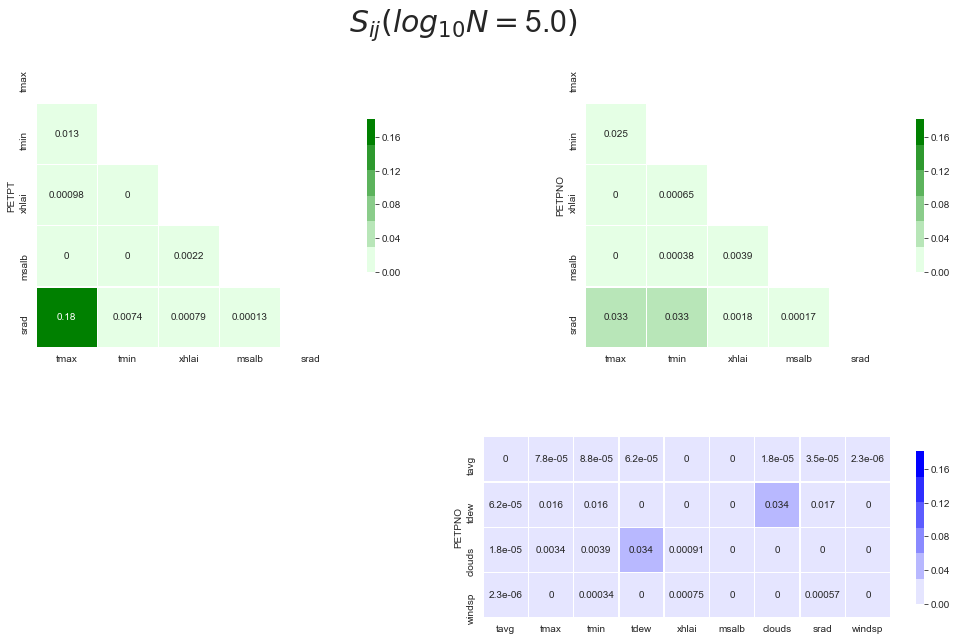

In [17]:
comparePET = ModelCompareS2(model1, model2, bounds1, bounds2, sample_list)
comparePET.compare()

##  b. PETPNO and PETPEN

We have already stated that PETPNO and PETPEN models are functionally similar with minor differences, most notably among them is the introduction of the 'eoratio' parameter. We have already discussed the importance of 'eoratio' in sensitivity analysis since its first order index is almost similar to that of 'srad' but marginally smaller. However, on comparing their total indices ($S_T$),  we notice that 'eoratio' contributes more to the variance analysis. This is primarily because of higher order effects overtaking the first order term. As discussed before and. shown below, the interaction between 'eoratio' and ('srad', 'xhlai', 'tmax', 'tmin') all have significant impact which ultimately leads to 'eoratio' having the largest $S_T$. The other noticaeble difference between the two models in our sensitivity analysis comes from 'tdew',  which does not interact with the other variables in PETPEN. The dew point temperature however, has a moderately strong second order index once it is paired with 'clouds' that measures cloud cover.

In [9]:
model1 = 'PETPNO'

bounds1 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [0.0, 10.0],
    'clouds': [0.0, 1.0]
}

model2 = 'PETPEN'

bounds2 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [1.0, 10.0],
    'windht': [1.0, 25.0],
    'vapr': [0.0, 20.0],
    'clouds': [0.0, 1.0],
    'eoratio': [0.0, 2.0]
}

sample_list = [10**x for x in range(5, 6)]

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


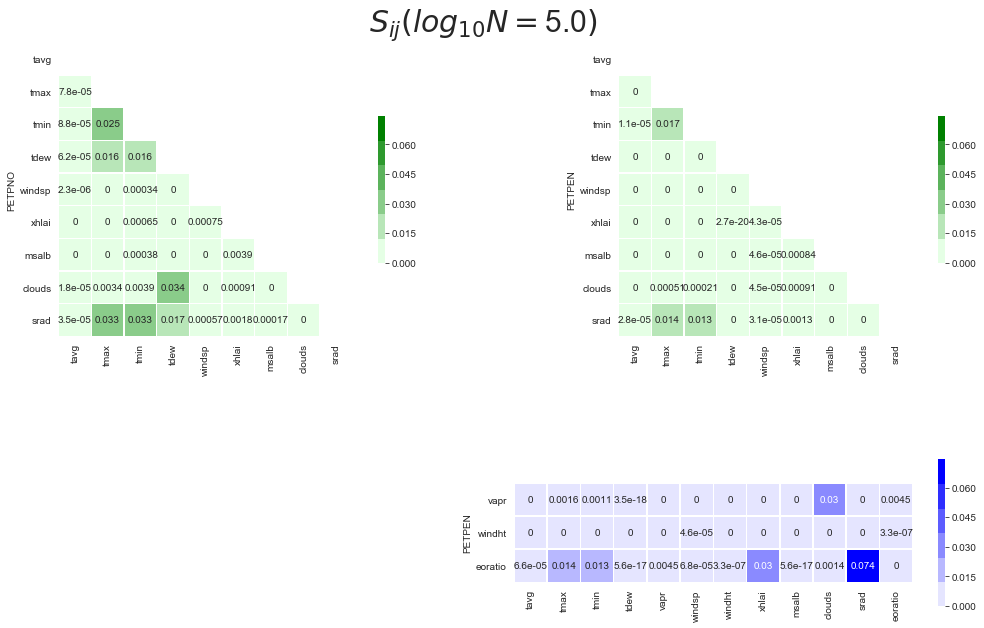

In [10]:
comparePET = ModelCompareS2(model1, model2, bounds1, bounds2, sample_list)
comparePET.compare()

## c. PETPNO and PETDYN

We now compare our sensitivity analysis results of PETPNO and PETDYN. As in the case of PETPEN, the output of PETPNO has similar functional dependence as seen in PETDYN. We have already discussed how the effect of 'tdew' in PETDYN is virtually absent at the first order even though there is a significant contribution ($\sim 0.1$) to S$_T$. Again, this can only be possible if higher order indices become large. From the plot below, we can see that in PETDYN, $S_{ij}$ between 'tdew' and 'clouds' is almost double of that in PEPNO. At the same time, the interaction between 'tdew' and 'srad' in PETPNO is several orders of magnitude smaller than what is observed in PETPNO. Everything else is almost identical.

In [18]:
model1 = 'PETPNO'

bounds1 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [0.0, 10.0],
    'clouds': [0.0, 1.0]
}

model2 = 'PETDYN'

bounds2 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [0.0, 10.0],
    'canht': [0.0, 5.0],
    'clouds': [0.0, 1.0]
}

sample_list = [10**x for x in range(5, 6)]

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


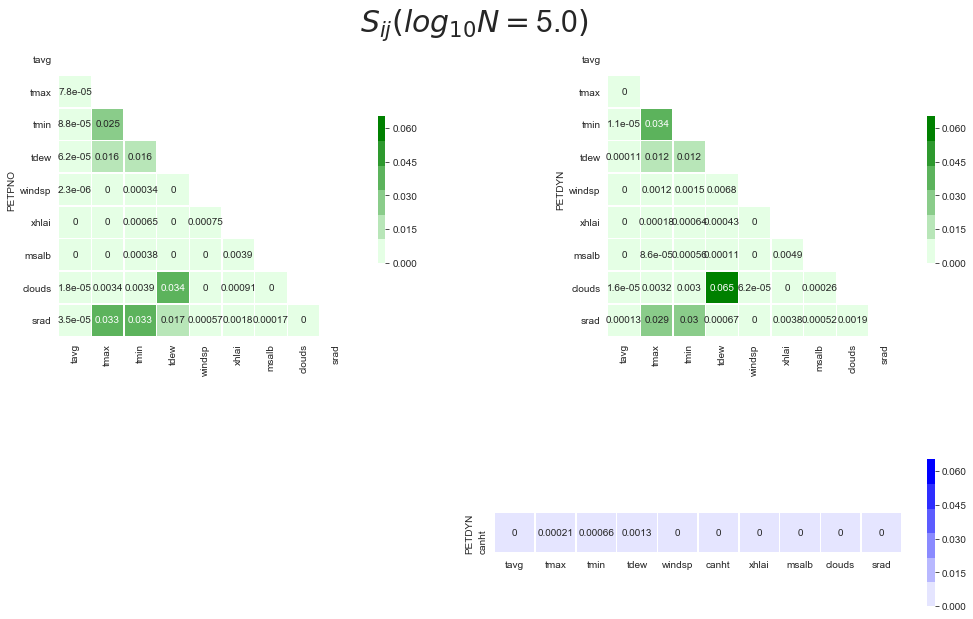

In [19]:
comparePET = ModelCompareS2(model1, model2, bounds1, bounds2, sample_list)
comparePET.compare()

##  d. PETDYN and PETPEN

We now arrive at the final comparison which involves PETDYN and PETPEN. In this case, both the models have non empty sets of shared and non-shared variables which is why the figure below has four different panels (purple panel -  PETDYN, blue panel - PETPEN). The interacting pairs that stand out are ('tdew', 'clouds') in PETDYN and ('srad', 'eoratio') in PETPEN. All other pairs have similar values in the shared parameter space.

In [11]:
model1 = 'PETDYN'

bounds1 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [0.0, 10.0],
    'canht': [0.0, 5.0],
    'clouds': [0.0, 1.0]
}


model2 = 'PETPEN'

bounds2 = {
    'tmax':[-30.0, 60.0],
    'tmin':[-30.0, 60.0],
    'srad': [0.0, 30.0],
    'msalb': [0.0, 1.0],
    'xhlai': [0.0, 20.0],
    'tavg': [-30, 60],
    'tdew': [-30, 60],
    'windsp': [1.0, 10.0],
    'windht': [1.0, 25.0],
    'vapr': [0.0, 20.0],
    'clouds': [0.0, 1.0],
    'eoratio': [0.0, 2.0]
}

sample_list = [10**x for x in range(5, 6)]

*** ALL OUTPUT FILES LIVE IN [.]
*** ALL OUTPUT FILES LIVE IN [.]


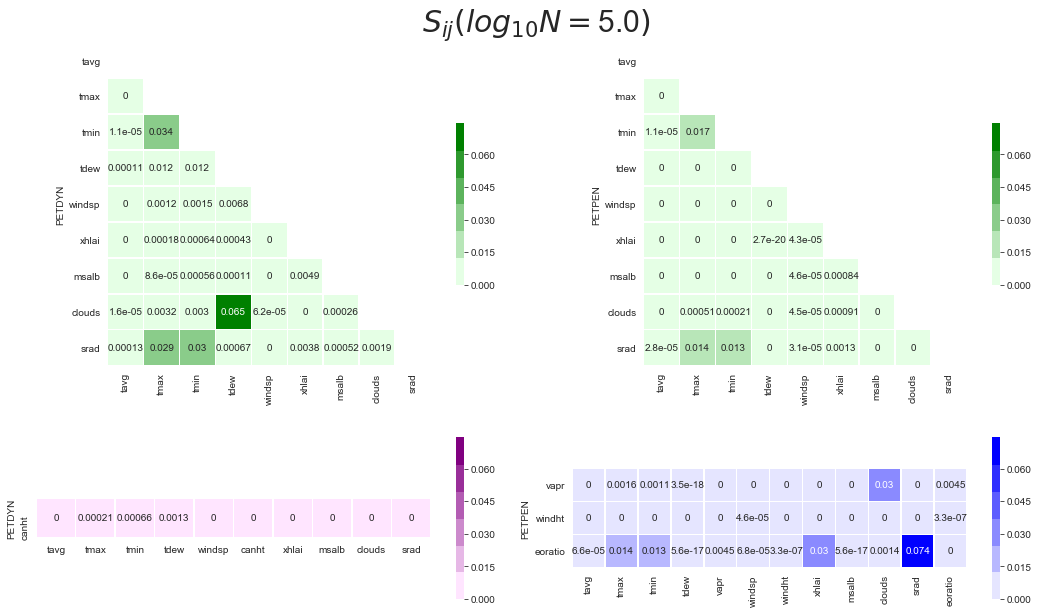

In [12]:
comparePET = ModelCompareS2(model1, model2, bounds1, bounds2, sample_list)
comparePET.compare()

# Earliest Common Descendant

One of the main objectives of model comaprisonn is to understand the differences in the functional relationship between the model output and their respective input parameters. So far, we have focussed on studying the variance dependece of the output to fluctuations in the inputs. In this section, we shall look at the structural representation of each model by translating the source code into a causal analysis graph (CAG) representation. Once this has been achieved, the procedure to identify syntactically similar segments of the source code has been outlined below

i. Since all the PET models have a non-empty set of shared variables, we randomly choose a pair of input parameters common to both the models.

ii. We then look for the node in the CAG (shown below) that is the first child/descendant of thses two parameters in each model. We shall designate this node as the earliest common descendant (ECD).

iii. This allows us to extract the stringified lambda functions associated with the descendants.

iv. Finally, a measure of similiarity is determined by calculating the levenshtein distance beteen the two lambda functions.

We have already discussed that that models based on penman-monteith equations i.e., (PETPNO, PETPEN, PETDYN) have similar attributes. Using the algorithm defined above, we shall perform a similarity measurement of the lambda representations of ECDs in both models as a result of structural differences.

## PETPNO CAG

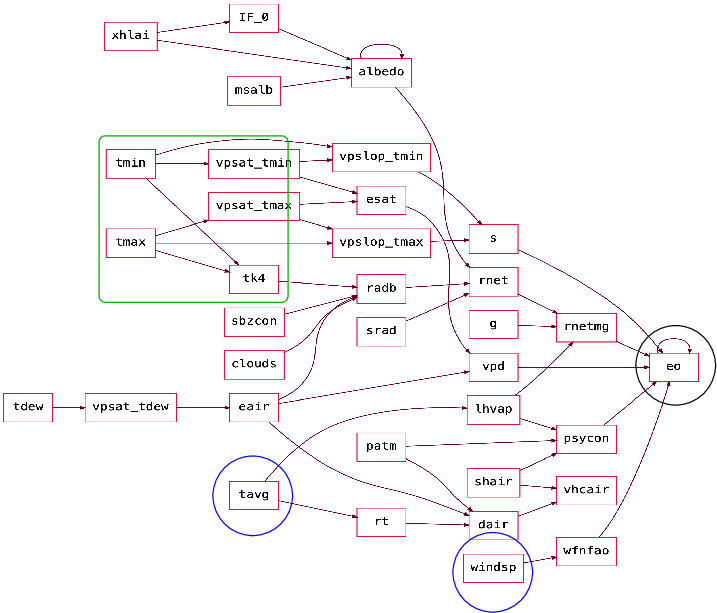

In [6]:
from IPython.display import Image

Image(filename = "PETPNO_ECD.png", width=1000, height=1000)

## PETPEN CAG

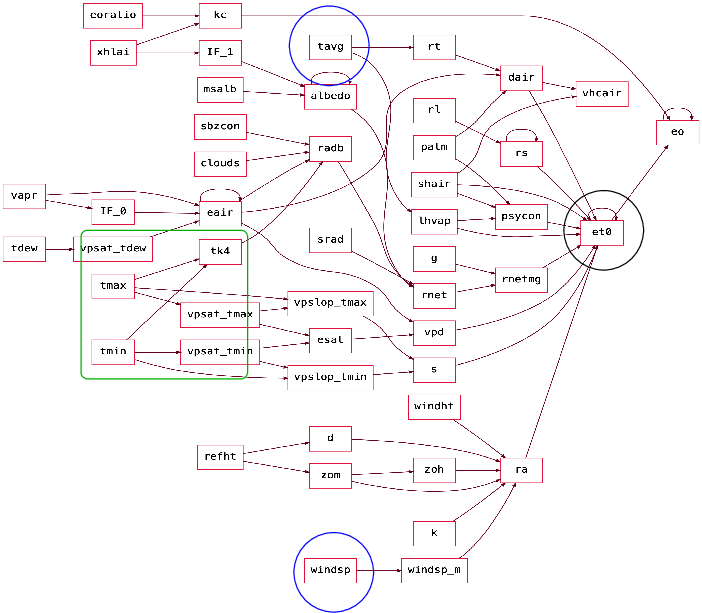

In [7]:
Image(filename = "PETPEN_ECD.png", width=1000, height=1000)

We shall look at a trivial case to check where the algorithm yields meaningful results. Let us choose the parameters 'tmax' and 'tmin' common to both PETPNO and PETPEN. From the CAG, it is obvious that the ECD in both cases is 'tk4'. A  rectangular box (green) enclosing the path from 'tmax' and 'tmin' to 'tk4' is shown above. The lambda functions associated with 'tk4' in both cases are identical and hence the levenshtein distance is zero. 

Let us look at a non-trivial case where we choose 'windsp' and 'tavg' to be our shared parameters (circled in blue). The path to their  ECD is far more complex than in the previous example. In PETPNO, the ECD by following the path sketched out by the CAG, turns out to be 'eo' whereas 'eto' is generated to be the first descendant in PETPEN. Their respective functional forms are given below:

$PETPNO ('windsp', 'tavg') : " (((s*rnetmg)+((psycon*wfnfao)*vpd))/(s+psycon)) "$

$PETPEN ('windsp', 'tavg') : " (et0/(lhvap/1000000.0)) "$

Here, 'rnetmg', 'psycon', 'wfnfao', 'vpd', and 's' are functions defined within PETPNO as is the case for 'lhvap' and 'eto' in PETPEN. The levenshtein distance for thesse two lambda functions is computed to be '22'.